## Import Dependencies

In [1]:
import csv
from pathlib import Path
import pandas as pd
import glob
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Prepare the Processed Acquisition file

In [2]:
acq_df = pd.read_csv('data/FMAcqProcessed2.csv')

In [3]:
acq_df.head()

,Unnamed: 0,loanIdentifier,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origDate,firstPmtDate,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore
0,711,102575552799,R,OTHER,7.625,253000,360,2000-02-01,2000-04-01,79.0,95.0,2.0,21.0,R,IN,468,0.0,0.0,656.0,655.0,655.5
1,752,102718910405,R,"JPMORGAN CHASE BANK, NA",8.500,187000,360,2000-02-01,2000-04-01,80.0,90.0,2.0,31.0,P,MI,483,0.0,0.0,712.0,706.0,709.0
2,785,102891952623,R,"JPMORGAN CHASE BANK, NA",8.625,150000,360,2000-01-01,2000-03-01,80.0,95.0,1.0,37.0,P,MA,21,0.0,0.0,717.0,717.0,717.0
3,841,103123692845,B,"JPMORGAN CHASE BANK, NA",8.500,243000,360,2000-02-01,2000-04-01,80.0,95.0,1.0,49.0,P,CA,926,0.0,0.0,682.0,682.0,682.0
4,1526,105732468779,C,REGIONS BANK,8.250,103000,360,2000-02-01,2000-04-01,80.0,90.0,2.0,20.0,P,TX,781,0.0,0.0,747.0,694.0,720.5


In [4]:
#Dropping columns we don't want
acq_df.drop(['Unnamed: 0'],1,inplace=True)

In [5]:
acq_df['origDate'] = pd.to_datetime(acq_df['origDate'], format='%Y/%m/%d')
acq_df['firstPmtDate'] = pd.to_datetime(acq_df['firstPmtDate'], format='%Y/%m/%d')

In [6]:
# sellerNames = acq_df['sellerName'].unique()
# statesList = acq_df['propState'].unique()

In [7]:
# # Make copy of the column to map from strings to integers
# acq_df['bankNumber'] = acq_df['sellerName']
# # Coerce the new column to category type
# acq_df['bankNumber'] = acq_df['bankNumber'].astype('category')
# # Convert the new column to integers for each unique string value
# acq_df['bankNumber'] = acq_df['bankNumber'].cat.codes
# # Capture the mapping to a dictionary
# sellerNameMap = pd.Series(acq_df.sellerName.values,index=acq_df.bankNumber).to_dict()
# # Drop original column leaving only the integer column for ML purposes
# acq_df.drop(columns=['sellerName'],inplace=True)
# print(sorted(sellerNameMap.items()))

In [8]:
# # Make copy of the column to map from strings to integers
# acq_df['stateNumber'] = acq_df['propState']
# # Coerce the new column to category type
# acq_df['stateNumber'] = acq_df['stateNumber'].astype('category')
# # Convert the new column to integers for each unique string value
# acq_df['stateNumber'] = acq_df['stateNumber'].cat.codes
# # Capture the mapping to a dictionary
# statePropMap = pd.Series(acq_df.propState.values,index=acq_df.stateNumber).to_dict()
# # Drop original column leaving only the integer column for ML purposes
# acq_df.drop(columns=['propState'],inplace=True)
# print(sorted(statePropMap.items()))

In [9]:
acq_df = acq_df.rename(columns={'loanIdentifier':'id'})

In [10]:
acq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25993874 entries, 0 to 25993873
Data columns (total 20 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                int64         
 1   origChannel       object        
 2   sellerName        object        
 3   origIntRate       float64       
 4   origUPB           int64         
 5   origLoanTerm      int64         
 6   origDate          datetime64[ns]
 7   firstPmtDate      datetime64[ns]
 8   origLTV           float64       
 9   origCLTV          float64       
 10  numBorrowers      float64       
 11  origDebtIncRatio  float64       
 12  loanPurp          object        
 13  propState         object        
 14  zipCode           int64         
 15  pMIperct          float64       
 16  mortInsType       float64       
 17  bestCreditScore   float64       
 18  worstCreditScore  float64       
 19  avgCreditScore    float64       
dtypes: datetime64[ns](2), float64(10), int64(4),

In [11]:
acq_df.head()

,id,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origDate,firstPmtDate,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore
0,102575552799,R,OTHER,7.625,253000,360,2000-02-01,2000-04-01,79.0,95.0,2.0,21.0,R,IN,468,0.0,0.0,656.0,655.0,655.5
1,102718910405,R,"JPMORGAN CHASE BANK, NA",8.500,187000,360,2000-02-01,2000-04-01,80.0,90.0,2.0,31.0,P,MI,483,0.0,0.0,712.0,706.0,709.0
2,102891952623,R,"JPMORGAN CHASE BANK, NA",8.625,150000,360,2000-01-01,2000-03-01,80.0,95.0,1.0,37.0,P,MA,21,0.0,0.0,717.0,717.0,717.0
3,103123692845,B,"JPMORGAN CHASE BANK, NA",8.500,243000,360,2000-02-01,2000-04-01,80.0,95.0,1.0,49.0,P,CA,926,0.0,0.0,682.0,682.0,682.0
4,105732468779,C,REGIONS BANK,8.250,103000,360,2000-02-01,2000-04-01,80.0,90.0,2.0,20.0,P,TX,781,0.0,0.0,747.0,694.0,720.5


In [12]:
acq_df.shape

(25993874, 20)

# Prepare the Processed Performance file

In [13]:
perf_df = pd.read_csv('D:\FMPerfProcessed.csv')

In [14]:
perf_df['rptPeriod'] = pd.to_datetime(perf_df['rptPeriod'], format='%Y/%m/%d')
perf_df['lastPdInstDate'] = pd.to_datetime(perf_df['lastPdInstDate'], format='%Y/%m/%d')
perf_df['zeroBalDate'] = pd.to_datetime(perf_df['zeroBalDate'], format='%Y/%m/%d')
perf_df['forecloDate'] = pd.to_datetime(perf_df['forecloDate'], format='%Y/%m/%d')
perf_df['dispDate'] = pd.to_datetime(perf_df['dispDate'], format='%Y/%m/%d')

In [15]:
perf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4052974 entries, 0 to 4052973
Data columns (total 29 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   id                          int64         
 1   rptPeriod                   datetime64[ns]
 2   currIntRate                 float64       
 3   currUPB                     float64       
 4   loanAge                     int64         
 5   monMatur                    float64       
 6   mSA                         int64         
 7   zeroBalCode                 float64       
 8   zeroBalDate                 datetime64[ns]
 9   lastPdInstDate              datetime64[ns]
 10  forecloDate                 datetime64[ns]
 11  dispDate                    datetime64[ns]
 12  forecloCost                 float64       
 13  propRepCost                 float64       
 14  recovCosts                  float64       
 15  miscCost                    float64       
 16  holdTaxCost       

## Get Freddie Mac 30 yr weekly rate

In [16]:
# import training_data via pandas module
fmac30 = pd.read_csv("data/FMAC30Agg.csv", low_memory=False)

In [17]:
fmac30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   month_year          590 non-null    object 
 1   fmacRateMax         590 non-null    float64
 2   fmacRateMin         590 non-null    float64
 3   fmacRateAvg         590 non-null    float64
 4   fmacRateVolatility  590 non-null    float64
dtypes: float64(4), object(1)
memory usage: 23.2+ KB


In [18]:
fmac30['month_year'] = pd.to_datetime(fmac30['month_year'])

In [19]:
fmac30 = fmac30.rename(columns={'month_year':'origDate'})

In [20]:
fmac30 = fmac30.set_index('origDate')

In [21]:
fmac30.head()

,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility
origDate,,,,
1971-04-01,7.33,7.29,7.3100,0.005487
1971-05-01,7.46,7.38,7.4250,0.010840
1971-06-01,7.54,7.52,7.5300,0.002660
1971-07-01,7.69,7.54,7.6040,0.019894
1971-08-01,7.73,7.66,7.6975,0.009138


## Get 10 yr Treasury daily rate

In [22]:
# import training_data via pandas module
fred10 = pd.read_csv("download/FRED-DGS10.csv", low_memory=False)

In [23]:
fred10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14575 entries, 0 to 14574
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    14575 non-null  object 
 1   Value   14575 non-null  float64
dtypes: float64(1), object(1)
memory usage: 227.9+ KB


In [24]:
fred10['Date'] = pd.to_datetime(fred10['Date'])

In [25]:
fred10 = fred10.set_index('Date').resample('D').ffill().reset_index()

In [26]:
fred10 = fred10.rename(columns={'Date':'origDate','Value':'fredRate'})

## Merge data

In [27]:
acq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25993874 entries, 0 to 25993873
Data columns (total 20 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                int64         
 1   origChannel       object        
 2   sellerName        object        
 3   origIntRate       float64       
 4   origUPB           int64         
 5   origLoanTerm      int64         
 6   origDate          datetime64[ns]
 7   firstPmtDate      datetime64[ns]
 8   origLTV           float64       
 9   origCLTV          float64       
 10  numBorrowers      float64       
 11  origDebtIncRatio  float64       
 12  loanPurp          object        
 13  propState         object        
 14  zipCode           int64         
 15  pMIperct          float64       
 16  mortInsType       float64       
 17  bestCreditScore   float64       
 18  worstCreditScore  float64       
 19  avgCreditScore    float64       
dtypes: datetime64[ns](2), float64(10), int64(4),

In [28]:
perf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4052974 entries, 0 to 4052973
Data columns (total 29 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   id                          int64         
 1   rptPeriod                   datetime64[ns]
 2   currIntRate                 float64       
 3   currUPB                     float64       
 4   loanAge                     int64         
 5   monMatur                    float64       
 6   mSA                         int64         
 7   zeroBalCode                 float64       
 8   zeroBalDate                 datetime64[ns]
 9   lastPdInstDate              datetime64[ns]
 10  forecloDate                 datetime64[ns]
 11  dispDate                    datetime64[ns]
 12  forecloCost                 float64       
 13  propRepCost                 float64       
 14  recovCosts                  float64       
 15  miscCost                    float64       
 16  holdTaxCost       

In [29]:
# Merge data
merged = pd.merge(acq_df, perf_df, on=["id"], how='inner')
merged.shape

(2663264, 48)

In [30]:
# Merge data
merged = pd.merge(merged, fmac30, on=["origDate"])
merged.shape

(2663264, 52)

In [31]:
# Merge data
merged = pd.merge(merged, fred10, on=["origDate"])
merged.shape

(2663264, 53)

In [32]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2663264 entries, 0 to 2663263
Data columns (total 53 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   id                          int64         
 1   origChannel                 object        
 2   sellerName                  object        
 3   origIntRate                 float64       
 4   origUPB                     int64         
 5   origLoanTerm                int64         
 6   origDate                    datetime64[ns]
 7   firstPmtDate                datetime64[ns]
 8   origLTV                     float64       
 9   origCLTV                    float64       
 10  numBorrowers                float64       
 11  origDebtIncRatio            float64       
 12  loanPurp                    object        
 13  propState                   object        
 14  zipCode                     int64         
 15  pMIperct                    float64       
 16  mortInsType       

In [33]:
fmac30.head()

,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility
origDate,,,,
1971-04-01,7.33,7.29,7.3100,0.005487
1971-05-01,7.46,7.38,7.4250,0.010840
1971-06-01,7.54,7.52,7.5300,0.002660
1971-07-01,7.69,7.54,7.6040,0.019894
1971-08-01,7.73,7.66,7.6975,0.009138


In [34]:
merged['rateDiffAbove'] = merged['origIntRate'] - merged['fmacRateMax']

In [35]:
merged['rateDiffBelow'] = merged['fmacRateMin'] - merged['origIntRate']

In [36]:
merged['rateDiffAvg'] = merged['origIntRate'] - merged['fmacRateAvg']

In [37]:
merged['rateDiffAbovePct'] = merged['rateDiffAbove'] / merged['fmacRateMax']

In [38]:
merged['rateDiffBelowPct'] = merged['rateDiffBelow'] / merged['fmacRateMin']

In [39]:
merged['rateDiffAvgPct'] = merged['rateDiffAvg'] / merged['fmacRateAvg']

In [40]:
acq_df['id'].nunique()

25993874

In [41]:
perf_df['id'].nunique()

4052974

In [42]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2663264 entries, 0 to 2663263
Data columns (total 59 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   id                          int64         
 1   origChannel                 object        
 2   sellerName                  object        
 3   origIntRate                 float64       
 4   origUPB                     int64         
 5   origLoanTerm                int64         
 6   origDate                    datetime64[ns]
 7   firstPmtDate                datetime64[ns]
 8   origLTV                     float64       
 9   origCLTV                    float64       
 10  numBorrowers                float64       
 11  origDebtIncRatio            float64       
 12  loanPurp                    object        
 13  propState                   object        
 14  zipCode                     int64         
 15  pMIperct                    float64       
 16  mortInsType       

In [43]:
merged.drop(['firstPmtDate','rptPeriod','currIntRate','currUPB','loanAge','monMatur',\
         'zeroBalDate','lastPdInstDate','forecloDate','dispDate','forecloCost','propRepCost','recovCosts',\
         'miscCost','holdTaxCost','saleProceed','credEnhProceed','repurchProceed','otherForecloProceed',\
         'nonIntUPB','prinForgivBal','repurchMakeWholeProceedFlg','forecloPrinWriteOffAmnt',\
             'servActivIndicator'],1,inplace=True)

In [44]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2663264 entries, 0 to 2663263
Data columns (total 35 columns):
 #   Column              Dtype         
---  ------              -----         
 0   id                  int64         
 1   origChannel         object        
 2   sellerName          object        
 3   origIntRate         float64       
 4   origUPB             int64         
 5   origLoanTerm        int64         
 6   origDate            datetime64[ns]
 7   origLTV             float64       
 8   origCLTV            float64       
 9   numBorrowers        float64       
 10  origDebtIncRatio    float64       
 11  loanPurp            object        
 12  propState           object        
 13  zipCode             int64         
 14  pMIperct            float64       
 15  mortInsType         float64       
 16  bestCreditScore     float64       
 17  worstCreditScore    float64       
 18  avgCreditScore      float64       
 19  mSA                 int64         
 20  ze

In [45]:
def getdummies(df):
    columns = df.columns[df.isnull().any()]
    nan_cols = df[columns]

    df.drop(nan_cols.columns, axis=1, inplace=True)

    cat = df.select_dtypes(include=['object'])
    num = df.drop(cat.columns, axis=1)

    data = pd.DataFrame()
    for i in cat.columns:
        tmp = pd.get_dummies(cat[i], drop_first=True)
        data = pd.concat([data, tmp], axis=1)

    df = pd.concat([num,data,nan_cols], axis=1).reset_index(drop=True)
    return df

In [46]:
df = getdummies(merged)

In [47]:
df.head()

,id,origIntRate,origUPB,origLoanTerm,origDate,origLTV,origCLTV,numBorrowers,origDebtIncRatio,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,mSA,zeroBalCode,deliqGood,deliqBad,deliqMax,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,C,R,"AMERIHOME MORTGAGE COMPANY, LLC",AMERISAVE MORTGAGE CORPORATION,AMTRUST BANK,"ASSOCIATED BANK, NA","BANK OF AMERICA, N.A.",BISHOPS GATE RESIDENTIAL MORTGAGE TRUST,"CALIBER HOME LOANS, INC.","CAPITAL ONE, NATIONAL ASSOCIATION","CASHCALL, INC.",CHASE HOME FINANCE,CHASE HOME FINANCE (CIE 1),CHASE HOME FINANCE FRANKLIN AMERICAN MORTGAGE COMPANY,"CHASE HOME FINANCE, LLC",CHICAGO MORTGAGE SOLUTIONS DBA INTERBANK MORTGAGE COMPANY,CHICAGO MORTGAGE SOLUTIONS DBA INTERFIRST MORTGAGE COMPANY,"CITIMORTGAGE, INC.","CITIZENS BANK, NATIONAL ASSOCIATION",CITIZENS MORTGAGE CORPORATION,"CMG MORTGAGE, INC",COLORADO FEDERAL SAVINGS BANK,DITECH FINANCIAL LLC,"DOWNEY SAVINGS AND LOAN ASSOCIATION, F.A.","EAGLE HOME MORTGAGE, LLC",EVERBANK,FAIRWAY INDEPENDENT MORTGAGE CORPORATION,"FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB",FEDERAL HOME LOAN BANK OF CHICAGO,FIFTH THIRD BANK,FINANCE OF AMERICA MORTGAGE LLC,FIRST BANK DBA FIRST BANK MORTGAGE,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,"FLAGSTAR BANK, FSB",FLAGSTAR CAPITAL MARKETS CORPORATION,FLEET NATIONAL BANK,FRANKLIN AMERICAN MORTGAGE COMPANY,FREEDOM MORTGAGE CORP.,FREMONT BANK,"GE MORTGAGE SERVICES, LLC","GMAC MORTGAGE, LLC","GMAC MORTGAGE, LLC (USAA FEDERAL SAVINGS BANK)",GUILD MORTGAGE COMPANY,"HARWOOD STREET FUNDING I, LLC","HOMEBRIDGE FINANCIAL SERVICES, INC.","HOMEWARD RESIDENTIAL, INC.","HSBC BANK USA, NATIONAL ASSOCIATION",IMPAC MORTGAGE CORP.,"IRWIN MORTGAGE, CORPORATION","J.P. MORGAN MADISON AVENUE SECURITIES TRUST, SERIES 2014-1","J.P. MORGAN MADISON AVENUE SECURITIES TRUST, SERIES 2015-1","JP MORGAN CHASE BANK, NA","JPMORGAN CHASE BANK, NA","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","LAKEVIEW LOAN SERVICING, LLC","LOANDEPOT.COM, LLC","METLIFE BANK, NA",METLIFE HOME LOANS LLC,"MOVEMENT MORTGAGE, LLC","NATIONSTAR MORTGAGE, LLC",NETBANK FUNDING SERVICES,NEW YORK COMMUNITY BANK,"NYCB MORTGAGE COMPANY, LLC",OLD KENT MORTGAGE COMPANY,OTHER,"PACIFIC UNION FINANCIAL, LLC",PENNYMAC CORP.,PHH MORTGAGE CORPORATION,PHH MORTGAGE CORPORATION (USAA FEDERAL SAVINGS BANK),PMT CREDIT RISK TRANSFER TRUST 2015-2,PMT CREDIT RISK TRANSFER TRUST 2016-1,PMTT4,"PNC BANK, N.A.","PRINCIPAL RESIDENTIAL MORTGAGE CAPITAL RESOURCES, LLC","PROSPECT MORTGAGE, LLC","PROVIDENT FUNDING ASSOCIATES, L.P.","PULTE MORTGAGE, L.L.C.",QUICKEN LOANS INC.,RBC MORTGAGE COMPANY,REGIONS BANK,ROUNDPOINT MORTGAGE COMPANY,"SANTANDER BANK, NATIONAL ASSOCIATION","SIERRA PACIFIC MORTGAGE COMPANY, INC.","STEARNS LENDING, LLC",STONEGATE MORTGAGE CORPORATION,SUNTRUST BANK,SUNTRUST MORTGAGE INC.,THE BRANCH BANKING AND TRUST COMPANY,THE HUNTINGTON NATIONAL BANK,THIRD FEDERAL SAVINGS AND LOAN,TRUIST BANK (FORMERLY SUNTRUST BANK),U.S. BANK N.A.,"UNITED SHORE FINANCIAL SERVICES, LLC D/B/A UNITED WHOLESALE MORTGAGE","UNITED SHORE FINANCIAL SERVICES, LLC DBA UNITED WHOLESALE MORTGAGE",USAA DIRECT DELIVERY,USAA FEDERAL SAVINGS BANK,WASHTENAW MORTGAGE COMPANY,"WELLS FARGO BANK, NA","WELLS FARGO BANK, N.A.",WELLS FARGO CREDIT RISK TRANSFER SECURITIES TRUST 2015,"WITMER FUNDING, LLC",P,R,U,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,GU,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
0,102718910405,8.500,187000,360,2000-02-01,80.0,90.0,2.0,31.0,483,0.0,0.0,712.0,706.0,709.0,19820,1.0,50,20,2.0,8.38,8.25,8.325,0.015758,6.62,0.120,-0.250,0.175,0.014320,-0.030303,0.021021,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [48]:
df.apply(lambda x: x.isnull().sum(), axis=0)

id              0
origIntRate     0
origUPB         0
origLoanTerm    0
origDate        0
               ..
VT              0
WA              0
WI              0
WV              0
WY              0
Length: 188, dtype: int64

In [49]:
def fillnan(df):
    columns = df.columns[df.isnull().any()]
    for name in columns:
        y = df.loc[df[name].notnull(), name].values
        X = df.loc[df[name].notnull()].drop(columns, axis=1).values
        X_test = df.loc[df[name].isnull()].drop(columns, axis=1).values
        if df[name].dtypes == 'object':
            model = RandomForestClassifier(n_estimators=400, max_depth=3)
            model.fit(X, y)
            df.loc[df[name].isnull(), name] = model.predict(X_test)
        else:
            model = RandomForestRegressor(n_estimators=400, max_depth=3)
            model.fit(X, y)
            df.loc[df[name].isnull(), name] = model.predict(X_test)
    return df

In [50]:
df = fillnan(df)

In [51]:
df.apply(lambda x: x.isnull().sum(), axis=0)

id              0
origIntRate     0
origUPB         0
origLoanTerm    0
origDate        0
               ..
VT              0
WA              0
WI              0
WV              0
WY              0
Length: 188, dtype: int64

## Write the all years to a *.csv file

In [124]:
df.to_csv('data/FM_Acq_Perf_FMAC2_ML.csv')

In [41]:
#merged = pd.read_csv('D:\FM_Acq_Perf_FMAC_ML.csv')

In [52]:
df.head()

,id,origIntRate,origUPB,origLoanTerm,origDate,origLTV,origCLTV,numBorrowers,origDebtIncRatio,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,mSA,zeroBalCode,deliqGood,deliqBad,deliqMax,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,C,R,"AMERIHOME MORTGAGE COMPANY, LLC",AMERISAVE MORTGAGE CORPORATION,AMTRUST BANK,"ASSOCIATED BANK, NA","BANK OF AMERICA, N.A.",BISHOPS GATE RESIDENTIAL MORTGAGE TRUST,"CALIBER HOME LOANS, INC.","CAPITAL ONE, NATIONAL ASSOCIATION","CASHCALL, INC.",CHASE HOME FINANCE,CHASE HOME FINANCE (CIE 1),CHASE HOME FINANCE FRANKLIN AMERICAN MORTGAGE COMPANY,"CHASE HOME FINANCE, LLC",CHICAGO MORTGAGE SOLUTIONS DBA INTERBANK MORTGAGE COMPANY,CHICAGO MORTGAGE SOLUTIONS DBA INTERFIRST MORTGAGE COMPANY,"CITIMORTGAGE, INC.","CITIZENS BANK, NATIONAL ASSOCIATION",CITIZENS MORTGAGE CORPORATION,"CMG MORTGAGE, INC",COLORADO FEDERAL SAVINGS BANK,DITECH FINANCIAL LLC,"DOWNEY SAVINGS AND LOAN ASSOCIATION, F.A.","EAGLE HOME MORTGAGE, LLC",EVERBANK,FAIRWAY INDEPENDENT MORTGAGE CORPORATION,"FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB",FEDERAL HOME LOAN BANK OF CHICAGO,FIFTH THIRD BANK,FINANCE OF AMERICA MORTGAGE LLC,FIRST BANK DBA FIRST BANK MORTGAGE,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,"FLAGSTAR BANK, FSB",FLAGSTAR CAPITAL MARKETS CORPORATION,FLEET NATIONAL BANK,FRANKLIN AMERICAN MORTGAGE COMPANY,FREEDOM MORTGAGE CORP.,FREMONT BANK,"GE MORTGAGE SERVICES, LLC","GMAC MORTGAGE, LLC","GMAC MORTGAGE, LLC (USAA FEDERAL SAVINGS BANK)",GUILD MORTGAGE COMPANY,"HARWOOD STREET FUNDING I, LLC","HOMEBRIDGE FINANCIAL SERVICES, INC.","HOMEWARD RESIDENTIAL, INC.","HSBC BANK USA, NATIONAL ASSOCIATION",IMPAC MORTGAGE CORP.,"IRWIN MORTGAGE, CORPORATION","J.P. MORGAN MADISON AVENUE SECURITIES TRUST, SERIES 2014-1","J.P. MORGAN MADISON AVENUE SECURITIES TRUST, SERIES 2015-1","JP MORGAN CHASE BANK, NA","JPMORGAN CHASE BANK, NA","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","LAKEVIEW LOAN SERVICING, LLC","LOANDEPOT.COM, LLC","METLIFE BANK, NA",METLIFE HOME LOANS LLC,"MOVEMENT MORTGAGE, LLC","NATIONSTAR MORTGAGE, LLC",NETBANK FUNDING SERVICES,NEW YORK COMMUNITY BANK,"NYCB MORTGAGE COMPANY, LLC",OLD KENT MORTGAGE COMPANY,OTHER,"PACIFIC UNION FINANCIAL, LLC",PENNYMAC CORP.,PHH MORTGAGE CORPORATION,PHH MORTGAGE CORPORATION (USAA FEDERAL SAVINGS BANK),PMT CREDIT RISK TRANSFER TRUST 2015-2,PMT CREDIT RISK TRANSFER TRUST 2016-1,PMTT4,"PNC BANK, N.A.","PRINCIPAL RESIDENTIAL MORTGAGE CAPITAL RESOURCES, LLC","PROSPECT MORTGAGE, LLC","PROVIDENT FUNDING ASSOCIATES, L.P.","PULTE MORTGAGE, L.L.C.",QUICKEN LOANS INC.,RBC MORTGAGE COMPANY,REGIONS BANK,ROUNDPOINT MORTGAGE COMPANY,"SANTANDER BANK, NATIONAL ASSOCIATION","SIERRA PACIFIC MORTGAGE COMPANY, INC.","STEARNS LENDING, LLC",STONEGATE MORTGAGE CORPORATION,SUNTRUST BANK,SUNTRUST MORTGAGE INC.,THE BRANCH BANKING AND TRUST COMPANY,THE HUNTINGTON NATIONAL BANK,THIRD FEDERAL SAVINGS AND LOAN,TRUIST BANK (FORMERLY SUNTRUST BANK),U.S. BANK N.A.,"UNITED SHORE FINANCIAL SERVICES, LLC D/B/A UNITED WHOLESALE MORTGAGE","UNITED SHORE FINANCIAL SERVICES, LLC DBA UNITED WHOLESALE MORTGAGE",USAA DIRECT DELIVERY,USAA FEDERAL SAVINGS BANK,WASHTENAW MORTGAGE COMPANY,"WELLS FARGO BANK, NA","WELLS FARGO BANK, N.A.",WELLS FARGO CREDIT RISK TRANSFER SECURITIES TRUST 2015,"WITMER FUNDING, LLC",P,R,U,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,GU,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
0,102718910405,8.500,187000,360,2000-02-01,80.0,90.0,2.0,31.0,483,0.0,0.0,712.0,706.0,709.0,19820,1.0,50,20,2.0,8.38,8.25,8.325,0.015758,6.62,0.120,-0.250,0.175,0.014320,-0.030303,0.021021,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

## Cut the data so it is manageable into the "3 Epochs"
* EPOCH 1 - APR 1999 - AUG 2008
* EPOCH 2 - JAN 2009 - JUNE 2013
* EPOCH 3 - SEPT 2013 - MARCH 2019

### EPOCH 1

In [55]:
# EPOCH 1 - APR 1999 - AUG 2008
epoch1_start_date = '1999-04-01'
epoch1_end_date = '2008-08-01'
mask = (df['origDate'] > epoch1_start_date) & (df['origDate'] <= epoch1_end_date)
mergedEpoch1 = df.loc[mask]

In [56]:
mergedEpoch1.origDate.min()

Timestamp('1999-05-01 00:00:00')

In [57]:
mergedEpoch1.origDate.max()

Timestamp('2008-08-01 00:00:00')

In [58]:
mergedEpoch1.shape

(2278367, 188)

In [59]:
mergedEpoch1.to_csv('data/FM_Acq_Perf_FMAC_EPOCH1_ML2.csv')

### EPOCH 2

In [60]:
#EPOCH 2 - JAN 2009 - JUNE 2013
epoch2_start_date = '2009-01-01'
epoch2_end_date = '2013-06-01'
mask = (df['origDate'] > epoch2_start_date) & (df['origDate'] <= epoch2_end_date)
mergedEpoch2 = merged.loc[mask]

In [61]:
mergedEpoch2.origDate.min()

Timestamp('2009-02-01 00:00:00')

In [62]:
mergedEpoch2.origDate.max()

Timestamp('2013-06-01 00:00:00')

In [63]:
mergedEpoch2.shape

(240948, 35)

In [52]:
mergedEpoch2.to_csv('data/FM_Acq_Perf_FMAC_EPOCH2_ML2.csv')

### EPOCH 3

In [64]:
#EPOCH 3 - SEPT 2013 - MARCH 2019
epoch3_start_date = '2013-10-01'
epoch3_end_date = '2019-03-01'
mask = (df['origDate'] > epoch3_start_date) & (df['origDate'] <= epoch3_end_date)
mergedEpoch3 = merged.loc[mask]

In [65]:
mergedEpoch3.origDate.min()

Timestamp('2013-11-01 00:00:00')

In [66]:
mergedEpoch3.origDate.max()

Timestamp('2019-03-01 00:00:00')

In [67]:
mergedEpoch3.shape

(90581, 35)

In [68]:
mergedEpoch3.to_csv('data/FM_Acq_Perf_FMAC_EPOCH3_ML2.csv')

## Remove negative values from rateDiffAbove, rateDiffBelow, rateDiffAbovePct, rateDiffBelowPct
If these values are negative they indicate the origIntRate was within the band of FMAC Max and Min for that month so we can't say definitively that the mortgator paid a Premium or had a Discount

In [69]:
# Check if zeroBalCode has nulls (which it shouldn't)
len(df) - df['zeroBalCode'].count()

0

In [70]:
df.head()

,id,origIntRate,origUPB,origLoanTerm,origDate,origLTV,origCLTV,numBorrowers,origDebtIncRatio,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,mSA,zeroBalCode,deliqGood,deliqBad,deliqMax,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,C,R,"AMERIHOME MORTGAGE COMPANY, LLC",AMERISAVE MORTGAGE CORPORATION,AMTRUST BANK,"ASSOCIATED BANK, NA","BANK OF AMERICA, N.A.",BISHOPS GATE RESIDENTIAL MORTGAGE TRUST,"CALIBER HOME LOANS, INC.","CAPITAL ONE, NATIONAL ASSOCIATION","CASHCALL, INC.",CHASE HOME FINANCE,CHASE HOME FINANCE (CIE 1),CHASE HOME FINANCE FRANKLIN AMERICAN MORTGAGE COMPANY,"CHASE HOME FINANCE, LLC",CHICAGO MORTGAGE SOLUTIONS DBA INTERBANK MORTGAGE COMPANY,CHICAGO MORTGAGE SOLUTIONS DBA INTERFIRST MORTGAGE COMPANY,"CITIMORTGAGE, INC.","CITIZENS BANK, NATIONAL ASSOCIATION",CITIZENS MORTGAGE CORPORATION,"CMG MORTGAGE, INC",COLORADO FEDERAL SAVINGS BANK,DITECH FINANCIAL LLC,"DOWNEY SAVINGS AND LOAN ASSOCIATION, F.A.","EAGLE HOME MORTGAGE, LLC",EVERBANK,FAIRWAY INDEPENDENT MORTGAGE CORPORATION,"FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB",FEDERAL HOME LOAN BANK OF CHICAGO,FIFTH THIRD BANK,FINANCE OF AMERICA MORTGAGE LLC,FIRST BANK DBA FIRST BANK MORTGAGE,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,"FLAGSTAR BANK, FSB",FLAGSTAR CAPITAL MARKETS CORPORATION,FLEET NATIONAL BANK,FRANKLIN AMERICAN MORTGAGE COMPANY,FREEDOM MORTGAGE CORP.,FREMONT BANK,"GE MORTGAGE SERVICES, LLC","GMAC MORTGAGE, LLC","GMAC MORTGAGE, LLC (USAA FEDERAL SAVINGS BANK)",GUILD MORTGAGE COMPANY,"HARWOOD STREET FUNDING I, LLC","HOMEBRIDGE FINANCIAL SERVICES, INC.","HOMEWARD RESIDENTIAL, INC.","HSBC BANK USA, NATIONAL ASSOCIATION",IMPAC MORTGAGE CORP.,"IRWIN MORTGAGE, CORPORATION","J.P. MORGAN MADISON AVENUE SECURITIES TRUST, SERIES 2014-1","J.P. MORGAN MADISON AVENUE SECURITIES TRUST, SERIES 2015-1","JP MORGAN CHASE BANK, NA","JPMORGAN CHASE BANK, NA","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","LAKEVIEW LOAN SERVICING, LLC","LOANDEPOT.COM, LLC","METLIFE BANK, NA",METLIFE HOME LOANS LLC,"MOVEMENT MORTGAGE, LLC","NATIONSTAR MORTGAGE, LLC",NETBANK FUNDING SERVICES,NEW YORK COMMUNITY BANK,"NYCB MORTGAGE COMPANY, LLC",OLD KENT MORTGAGE COMPANY,OTHER,"PACIFIC UNION FINANCIAL, LLC",PENNYMAC CORP.,PHH MORTGAGE CORPORATION,PHH MORTGAGE CORPORATION (USAA FEDERAL SAVINGS BANK),PMT CREDIT RISK TRANSFER TRUST 2015-2,PMT CREDIT RISK TRANSFER TRUST 2016-1,PMTT4,"PNC BANK, N.A.","PRINCIPAL RESIDENTIAL MORTGAGE CAPITAL RESOURCES, LLC","PROSPECT MORTGAGE, LLC","PROVIDENT FUNDING ASSOCIATES, L.P.","PULTE MORTGAGE, L.L.C.",QUICKEN LOANS INC.,RBC MORTGAGE COMPANY,REGIONS BANK,ROUNDPOINT MORTGAGE COMPANY,"SANTANDER BANK, NATIONAL ASSOCIATION","SIERRA PACIFIC MORTGAGE COMPANY, INC.","STEARNS LENDING, LLC",STONEGATE MORTGAGE CORPORATION,SUNTRUST BANK,SUNTRUST MORTGAGE INC.,THE BRANCH BANKING AND TRUST COMPANY,THE HUNTINGTON NATIONAL BANK,THIRD FEDERAL SAVINGS AND LOAN,TRUIST BANK (FORMERLY SUNTRUST BANK),U.S. BANK N.A.,"UNITED SHORE FINANCIAL SERVICES, LLC D/B/A UNITED WHOLESALE MORTGAGE","UNITED SHORE FINANCIAL SERVICES, LLC DBA UNITED WHOLESALE MORTGAGE",USAA DIRECT DELIVERY,USAA FEDERAL SAVINGS BANK,WASHTENAW MORTGAGE COMPANY,"WELLS FARGO BANK, NA","WELLS FARGO BANK, N.A.",WELLS FARGO CREDIT RISK TRANSFER SECURITIES TRUST 2015,"WITMER FUNDING, LLC",P,R,U,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,GU,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
0,102718910405,8.500,187000,360,2000-02-01,80.0,90.0,2.0,31.0,483,0.0,0.0,712.0,706.0,709.0,19820,1.0,50,20,2.0,8.38,8.25,8.325,0.015758,6.62,0.120,-0.250,0.175,0.014320,-0.030303,0.021021,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [71]:
df.columns

Index(['id', 'origIntRate', 'origUPB', 'origLoanTerm', 'origDate', 'origLTV',
       'origCLTV', 'numBorrowers', 'origDebtIncRatio', 'zipCode',
       ...
       'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object', length=188)

In [58]:
# Save the data prior to the binning steps
#merged.to_csv('data/FannieAcq2000-19FMac30.csv')

## Create Classes for the rateDiffPct field
#### rateDiffPct is the difference between the origination Interest Rate for the loan and the Freddie Mac 30 year Mortgage rate for the week of the origination of the loan. We want to bin rates by what % they differed from the published FMAC rate.

<AxesSubplot:>

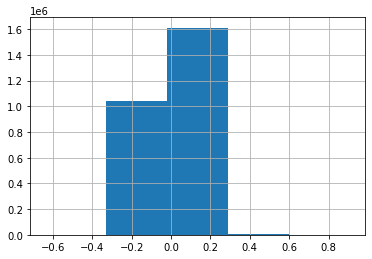

In [73]:
df['rateDiffAvgPct'].hist(bins=5)

In [75]:
bin_width = (df['rateDiffAvgPct'].max() - df['rateDiffAvgPct'].min())/5

In [76]:
bin_width

0.3091625249865403

In [77]:
df['rateDiffAvgPct'].describe()

count    2.663264e+06
mean    -4.473579e-03
std      8.300015e-02
min     -6.383594e-01
25%     -5.111336e-02
50%     -1.175088e-03
75%      4.294479e-02
max      9.074532e-01
Name: rateDiffAvgPct, dtype: float64

In [79]:
df['rateDiffAvgPct'].value_counts(bins=7, sort=False)

(-0.641, -0.418]         61
(-0.418, -0.197]      45188
(-0.197, 0.0241]    1684040
(0.0241, 0.245]      917932
(0.245, 0.466]        15819
(0.466, 0.687]          220
(0.687, 0.907]            4
Name: rateDiffAvgPct, dtype: int64

In [81]:
df['rank'] = pd.cut(df['rateDiffAvgPct'], 9, labels=[0,1,2,3,4,5,6,7,8])

In [82]:
df['rank'] = pd.to_numeric(df['rank'])

In [91]:
df['rank'].value_counts()

3    1866095
4     567199
2     202521
5      24017
1       2391
6        977
0         33
7         29
8          2
Name: rank, dtype: int64

<AxesSubplot:ylabel='Frequency'>

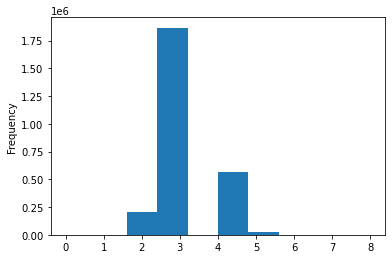

In [90]:
df['rank'].plot(kind='hist')

In [92]:
df.head()

,id,origIntRate,origUPB,origLoanTerm,origDate,origLTV,origCLTV,numBorrowers,origDebtIncRatio,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,mSA,zeroBalCode,deliqGood,deliqBad,deliqMax,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,C,R,"AMERIHOME MORTGAGE COMPANY, LLC",AMERISAVE MORTGAGE CORPORATION,AMTRUST BANK,"ASSOCIATED BANK, NA","BANK OF AMERICA, N.A.",BISHOPS GATE RESIDENTIAL MORTGAGE TRUST,"CALIBER HOME LOANS, INC.","CAPITAL ONE, NATIONAL ASSOCIATION","CASHCALL, INC.",CHASE HOME FINANCE,CHASE HOME FINANCE (CIE 1),CHASE HOME FINANCE FRANKLIN AMERICAN MORTGAGE COMPANY,"CHASE HOME FINANCE, LLC",CHICAGO MORTGAGE SOLUTIONS DBA INTERBANK MORTGAGE COMPANY,CHICAGO MORTGAGE SOLUTIONS DBA INTERFIRST MORTGAGE COMPANY,"CITIMORTGAGE, INC.","CITIZENS BANK, NATIONAL ASSOCIATION",CITIZENS MORTGAGE CORPORATION,"CMG MORTGAGE, INC",COLORADO FEDERAL SAVINGS BANK,DITECH FINANCIAL LLC,"DOWNEY SAVINGS AND LOAN ASSOCIATION, F.A.","EAGLE HOME MORTGAGE, LLC",EVERBANK,FAIRWAY INDEPENDENT MORTGAGE CORPORATION,"FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB",FEDERAL HOME LOAN BANK OF CHICAGO,FIFTH THIRD BANK,FINANCE OF AMERICA MORTGAGE LLC,FIRST BANK DBA FIRST BANK MORTGAGE,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,"FLAGSTAR BANK, FSB",FLAGSTAR CAPITAL MARKETS CORPORATION,FLEET NATIONAL BANK,FRANKLIN AMERICAN MORTGAGE COMPANY,FREEDOM MORTGAGE CORP.,FREMONT BANK,"GE MORTGAGE SERVICES, LLC","GMAC MORTGAGE, LLC","GMAC MORTGAGE, LLC (USAA FEDERAL SAVINGS BANK)",GUILD MORTGAGE COMPANY,"HARWOOD STREET FUNDING I, LLC","HOMEBRIDGE FINANCIAL SERVICES, INC.","HOMEWARD RESIDENTIAL, INC.","HSBC BANK USA, NATIONAL ASSOCIATION",IMPAC MORTGAGE CORP.,"IRWIN MORTGAGE, CORPORATION","J.P. MORGAN MADISON AVENUE SECURITIES TRUST, SERIES 2014-1","J.P. MORGAN MADISON AVENUE SECURITIES TRUST, SERIES 2015-1","JP MORGAN CHASE BANK, NA","JPMORGAN CHASE BANK, NA","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","LAKEVIEW LOAN SERVICING, LLC","LOANDEPOT.COM, LLC","METLIFE BANK, NA",METLIFE HOME LOANS LLC,"MOVEMENT MORTGAGE, LLC","NATIONSTAR MORTGAGE, LLC",NETBANK FUNDING SERVICES,NEW YORK COMMUNITY BANK,"NYCB MORTGAGE COMPANY, LLC",OLD KENT MORTGAGE COMPANY,OTHER,"PACIFIC UNION FINANCIAL, LLC",PENNYMAC CORP.,PHH MORTGAGE CORPORATION,PHH MORTGAGE CORPORATION (USAA FEDERAL SAVINGS BANK),PMT CREDIT RISK TRANSFER TRUST 2015-2,PMT CREDIT RISK TRANSFER TRUST 2016-1,PMTT4,"PNC BANK, N.A.","PRINCIPAL RESIDENTIAL MORTGAGE CAPITAL RESOURCES, LLC","PROSPECT MORTGAGE, LLC","PROVIDENT FUNDING ASSOCIATES, L.P.","PULTE MORTGAGE, L.L.C.",QUICKEN LOANS INC.,RBC MORTGAGE COMPANY,REGIONS BANK,ROUNDPOINT MORTGAGE COMPANY,"SANTANDER BANK, NATIONAL ASSOCIATION","SIERRA PACIFIC MORTGAGE COMPANY, INC.","STEARNS LENDING, LLC",STONEGATE MORTGAGE CORPORATION,SUNTRUST BANK,SUNTRUST MORTGAGE INC.,THE BRANCH BANKING AND TRUST COMPANY,THE HUNTINGTON NATIONAL BANK,THIRD FEDERAL SAVINGS AND LOAN,TRUIST BANK (FORMERLY SUNTRUST BANK),U.S. BANK N.A.,"UNITED SHORE FINANCIAL SERVICES, LLC D/B/A UNITED WHOLESALE MORTGAGE","UNITED SHORE FINANCIAL SERVICES, LLC DBA UNITED WHOLESALE MORTGAGE",USAA DIRECT DELIVERY,USAA FEDERAL SAVINGS BANK,WASHTENAW MORTGAGE COMPANY,"WELLS FARGO BANK, NA","WELLS FARGO BANK, N.A.",WELLS FARGO CREDIT RISK TRANSFER SECURITIES TRUST 2015,"WITMER FUNDING, LLC",P,R,U,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,GU,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY,rank,deal
0,102718910405,8.500,187000,360,2000-02-01,80.0,90.0,2.0,31.0,483,0.0,0.0,712.0,706.0,709.0,19820,1.0,50,20,2.0,8.38,8.25,8.325,0.015758,6.62,0.120,-0.250,0.175,0.014320,-0.030303,0.021021,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [87]:
prem = df['rateDiffAvgPct']
deal = np.where(prem < 0, 'Discount',
                np.where(prem == 0, 'Par',
                np.where(prem > 0, 'Premium', np.nan)))

df['deal'] = pd.Categorical(deal,
                            categories=['Discount','Par','Premium'],
                            ordered=True)

In [88]:
df.head()

,id,origIntRate,origUPB,origLoanTerm,origDate,origLTV,origCLTV,numBorrowers,origDebtIncRatio,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,mSA,zeroBalCode,deliqGood,deliqBad,deliqMax,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,C,R,"AMERIHOME MORTGAGE COMPANY, LLC",AMERISAVE MORTGAGE CORPORATION,AMTRUST BANK,"ASSOCIATED BANK, NA","BANK OF AMERICA, N.A.",BISHOPS GATE RESIDENTIAL MORTGAGE TRUST,"CALIBER HOME LOANS, INC.","CAPITAL ONE, NATIONAL ASSOCIATION","CASHCALL, INC.",CHASE HOME FINANCE,CHASE HOME FINANCE (CIE 1),CHASE HOME FINANCE FRANKLIN AMERICAN MORTGAGE COMPANY,"CHASE HOME FINANCE, LLC",CHICAGO MORTGAGE SOLUTIONS DBA INTERBANK MORTGAGE COMPANY,CHICAGO MORTGAGE SOLUTIONS DBA INTERFIRST MORTGAGE COMPANY,"CITIMORTGAGE, INC.","CITIZENS BANK, NATIONAL ASSOCIATION",CITIZENS MORTGAGE CORPORATION,"CMG MORTGAGE, INC",COLORADO FEDERAL SAVINGS BANK,DITECH FINANCIAL LLC,"DOWNEY SAVINGS AND LOAN ASSOCIATION, F.A.","EAGLE HOME MORTGAGE, LLC",EVERBANK,FAIRWAY INDEPENDENT MORTGAGE CORPORATION,"FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB",FEDERAL HOME LOAN BANK OF CHICAGO,FIFTH THIRD BANK,FINANCE OF AMERICA MORTGAGE LLC,FIRST BANK DBA FIRST BANK MORTGAGE,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,"FLAGSTAR BANK, FSB",FLAGSTAR CAPITAL MARKETS CORPORATION,FLEET NATIONAL BANK,FRANKLIN AMERICAN MORTGAGE COMPANY,FREEDOM MORTGAGE CORP.,FREMONT BANK,"GE MORTGAGE SERVICES, LLC","GMAC MORTGAGE, LLC","GMAC MORTGAGE, LLC (USAA FEDERAL SAVINGS BANK)",GUILD MORTGAGE COMPANY,"HARWOOD STREET FUNDING I, LLC","HOMEBRIDGE FINANCIAL SERVICES, INC.","HOMEWARD RESIDENTIAL, INC.","HSBC BANK USA, NATIONAL ASSOCIATION",IMPAC MORTGAGE CORP.,"IRWIN MORTGAGE, CORPORATION","J.P. MORGAN MADISON AVENUE SECURITIES TRUST, SERIES 2014-1","J.P. MORGAN MADISON AVENUE SECURITIES TRUST, SERIES 2015-1","JP MORGAN CHASE BANK, NA","JPMORGAN CHASE BANK, NA","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","LAKEVIEW LOAN SERVICING, LLC","LOANDEPOT.COM, LLC","METLIFE BANK, NA",METLIFE HOME LOANS LLC,"MOVEMENT MORTGAGE, LLC","NATIONSTAR MORTGAGE, LLC",NETBANK FUNDING SERVICES,NEW YORK COMMUNITY BANK,"NYCB MORTGAGE COMPANY, LLC",OLD KENT MORTGAGE COMPANY,OTHER,"PACIFIC UNION FINANCIAL, LLC",PENNYMAC CORP.,PHH MORTGAGE CORPORATION,PHH MORTGAGE CORPORATION (USAA FEDERAL SAVINGS BANK),PMT CREDIT RISK TRANSFER TRUST 2015-2,PMT CREDIT RISK TRANSFER TRUST 2016-1,PMTT4,"PNC BANK, N.A.","PRINCIPAL RESIDENTIAL MORTGAGE CAPITAL RESOURCES, LLC","PROSPECT MORTGAGE, LLC","PROVIDENT FUNDING ASSOCIATES, L.P.","PULTE MORTGAGE, L.L.C.",QUICKEN LOANS INC.,RBC MORTGAGE COMPANY,REGIONS BANK,ROUNDPOINT MORTGAGE COMPANY,"SANTANDER BANK, NATIONAL ASSOCIATION","SIERRA PACIFIC MORTGAGE COMPANY, INC.","STEARNS LENDING, LLC",STONEGATE MORTGAGE CORPORATION,SUNTRUST BANK,SUNTRUST MORTGAGE INC.,THE BRANCH BANKING AND TRUST COMPANY,THE HUNTINGTON NATIONAL BANK,THIRD FEDERAL SAVINGS AND LOAN,TRUIST BANK (FORMERLY SUNTRUST BANK),U.S. BANK N.A.,"UNITED SHORE FINANCIAL SERVICES, LLC D/B/A UNITED WHOLESALE MORTGAGE","UNITED SHORE FINANCIAL SERVICES, LLC DBA UNITED WHOLESALE MORTGAGE",USAA DIRECT DELIVERY,USAA FEDERAL SAVINGS BANK,WASHTENAW MORTGAGE COMPANY,"WELLS FARGO BANK, NA","WELLS FARGO BANK, N.A.",WELLS FARGO CREDIT RISK TRANSFER SECURITIES TRUST 2015,"WITMER FUNDING, LLC",P,R,U,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,GU,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY,rank,deal
0,102718910405,8.500,187000,360,2000-02-01,80.0,90.0,2.0,31.0,483,0.0,0.0,712.0,706.0,709.0,19820,1.0,50,20,2.0,8.38,8.25,8.325,0.015758,6.62,0.120,-0.250,0.175,0.014320,-0.030303,0.021021,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [89]:
df.to_csv('data/FannieAcq2019Q1FMac30binDeal2.csv')

## Create a 2.5% representative sample dataset 

In [93]:
sample2pt5 = df.sample(frac =.025)

In [94]:
sample2pt5.shape

(66582, 190)

In [95]:
sample2pt5.to_csv('data/FannieAcq2000-19FMac30-sample2pt5.csv')

In [96]:
corrSample2pt5 = sample2pt5.corr()

Text(0.5, 1.0, 'Pearson Correlation matrix for Fannie 2019 Q1 avg Fico scores dataset')

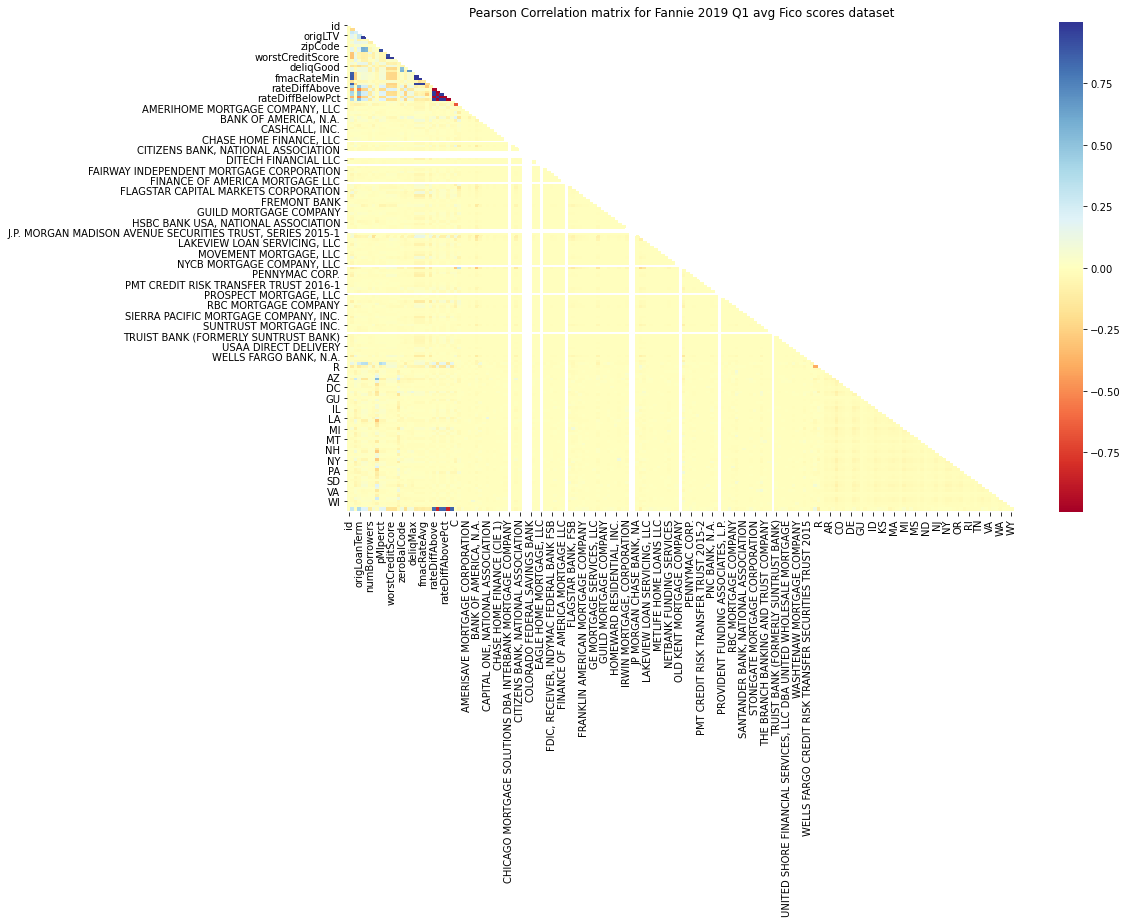

In [97]:
# Plot the Pearson Correlation reduced matrix
matrix = np.triu(corrSample2pt5)
fig, ax = plt.subplots(figsize=(15,9)) 
ax = sns.heatmap(corrSample2pt5,   mask = matrix, cmap = 'RdYlBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Pearson Correlation matrix for Fannie 2019 Q1 avg Fico scores dataset')

In [73]:
# corrSample25.to_csv('data/corrFMAcqFMacSample2pt5.csv')

## Sample25 Python Profile

In [98]:
pp.ProfileReport(sample2pt5)

NameError: name 'pp' is not defined

## Filter the data by some parameters

In [74]:
quicken = df[(df['sellerName'] == 'QUICKEN LOANS INC.')]

In [76]:
quicken.shape

(379842, 26)

In [79]:
quicken14 = quicken[(quicken['origDate'] >= '1/1/2014')]

In [80]:
quicken14.shape

(293383, 26)

In [81]:
quicken14.to_csv('data/Quicken14.csv')

## Large Dataset Correlation

Text(0.5, 1, 'Pearson Correlation matrix for Fannie 2019 Q1 avg Fico scores dataset')

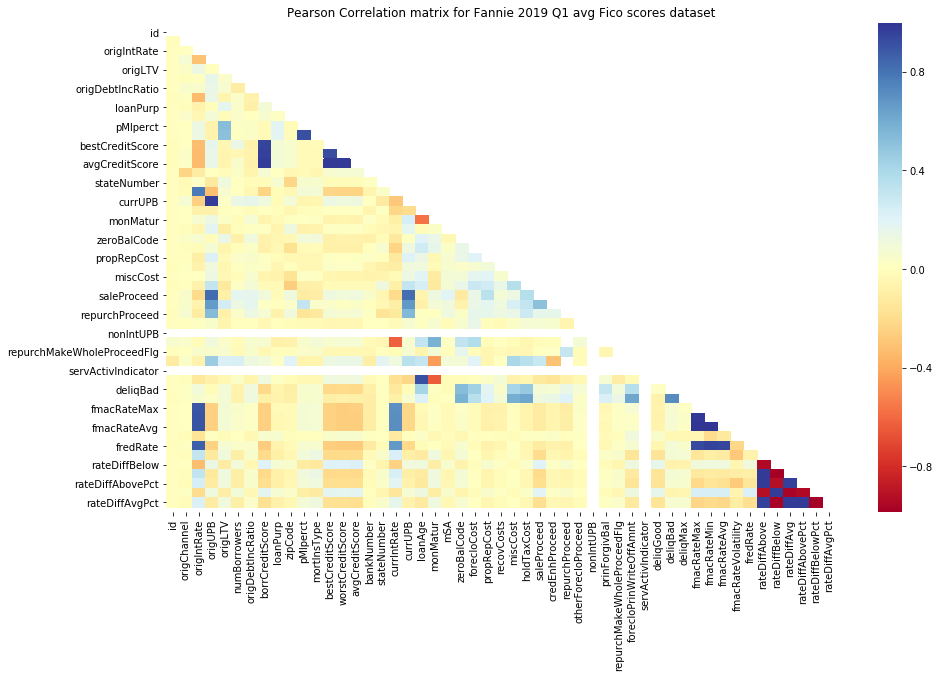

In [69]:
corr = merged.corr()

# Plot the Pearson Correlation reduced matrix
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(15,9)) 
ax = sns.heatmap(corr,   mask = matrix, cmap = 'RdYlBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Pearson Correlation matrix for Fannie 2019 Q1 avg Fico scores dataset')

In [70]:
corr.to_csv('data/corrFMAcqFMac.csv')

In [66]:
pp.ProfileReport(merged)

Number of variables,25
Number of observations,10464607
Total Missing (%),0.0%
Total size in memory,2.0 GiB
Average record size in memory,208.0 B
Numeric,13
Categorical,2
Boolean,0
Date,2
Text (Unique),0
Rejected,8
